# T4 Spectral analsyis of analog signals

## Fast Fourier transform of a constructed signal

Let us reconsider the example from class. The signal is composed of two sine waves, each featuring a different frequency. Furthermore, noise is added to the signal. 

The code below performs a FFT on the signal and displays the orignal signal without noise, the signal with noise and the FFT. Let's go step by step through the code and understand it. 

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


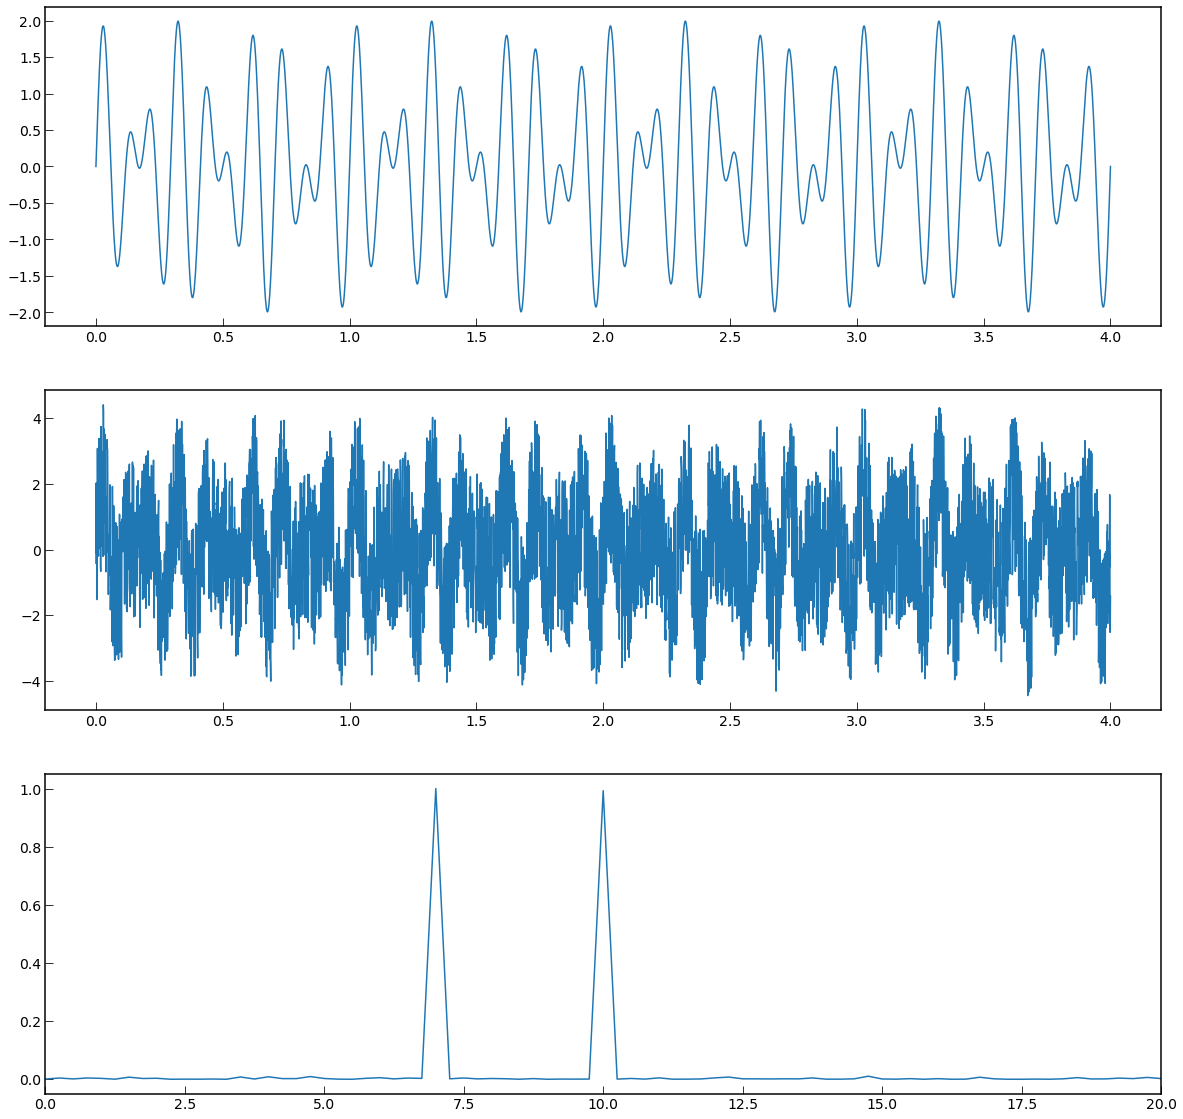

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# constructing the signal ######################
fs = 1000     #1 
duration = 4  #2 
freq1 = 10    #3 
freq2 = 7     #4 


t = np.linspace(0,duration,fs*duration)        #5
y1 = np.sin(2.*np.pi*t*freq1)                  #6
y2 = np.sin(2.*np.pi*t*freq2)                  #7
y3 = y1 + y2                                   #8
y3noise = y3 + 5*(np.random.rand(len(t))-0.5)  #9


# performing FFT on signal ######################
nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(y3noise)               #11
fBase = np.linspace(0,nyquist,int(np.floor(len(y3noise)/2)+1)) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
complexConjugate = np.conj(halfTheSignal)        #14
powe = halfTheSignal*complexConjugate            #15

# plotting results ##############################
fig = plt.figure(figsize=(20,20))                #16
ax0 = fig.add_subplot(311)                       #17
ax0.plot(t,y3)                                   #18

#
ax1 = fig.add_subplot(312)                       #19
ax1.plot(t,y3noise)                              #20
                        
ax2 = fig.add_subplot(313)                       #21

ax2.plot(fBase,powe/max(powe))                   #22
ax2.set_xlim([0,20])                             #23
 
plt.show()                                       #24



#### Exploring the FFT example

Let's modify the code to obtain some deeper insights into what is going on. 

1. How does the pure output of the `np.fft.fft()` function look like? 
2. What happens to the signal and the FFT if you increase the noise amplitude to 20 instead of 5? 
3. Add a third sinusoidal function to the signal. This function should have the frequency of 0.5 Hz. 
4. What happens to the signal and the FFT if a constant term is added to the signal? 

In [2]:
# your code goes here

<div class="alert alert-info">
<em>Advanced assignment :</em>
    
1. What happens in the time and frequency domain if one of the oscillations is described by a cosine   function, instead of the sin function? 

</div>

## Calculating the spectrogram of a signal

Similar to what we have seen in class, we construct a chirp signal using the `scipy.signal.chirp()` function and compute the spectrogram of the chrip. Remember that the spectrogram resloves the change in frequency content of the signal over time. To calculate the spectrogram, we will use the `scipy.signal.spectrogram()` function. 

The code below computes the spectrogram of the signal and displays the signal and the spectrogram. Let's go step by step through the code and understand it.

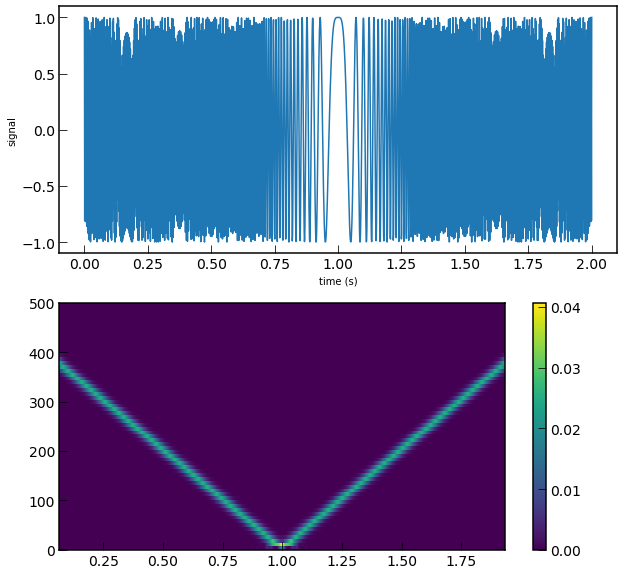

In [43]:
import scipy.signal as sg


# constructing the signal #################
fs = 1000                          #1
time = np.linspace(0,2,fs*2)       #2
y=sg.chirp(time,400,1,0,'linear')  #3


# computing the spetrogram ################
windLength = 128              #4
overl = windLength-1          #5
wind=np.hanning(windLength)   #6
#wind=np.kaiser(windLength,0) #7
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind),overl) #8

# producing the figure ################
fig=plt.figure(figsize=(10,10))  #9

ax0 = plt.subplot(2,1,1)          #10
ax0.plot(time,y)                  #11
ax0.set_xlabel('time (s)')        #12
ax0.set_ylabel('signal')          #13

ax1 = plt.subplot(2,1,2)          #14


im = ax1.pcolormesh(tt,f,Sxx)     #15
fig.colorbar(im, ax=ax1)          #16  
ax.set_xlabel('time (s)')         #17
ax.set_ylabel('frequency (Hz)')            #18

plt.show()                        #19

The chirp created by the function `scipy.signal.chrip` creates an osciallation which starts at 400 Hz, linearly decrases to 0 Hz at 1 sec, and linearly increases to 400 Hz at 2 sec. This behavior is evident in the spectrogram but not so easy to discern from the signal in the time domain. 

<div class="alert alert-info">
<em>Advanced assignment :</em>
    
1. Play with the window size of the spectrogram calculation? What happens if the window size is descreased or increased? Why?  

2. Contruct different types of chrips and inspect the respective spectrograms : 
   - linear decreasing frequency from 400 Hz at 0 s to 0 at 2 s 
   - quadradic increase of frequency from 10 Hz at 0 to 500 Hz at 2 s
   - hyperbolic decrease of frequency from 500 Hz at 0 to 10 Hz at 2

</div>

## The end